In [1]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:,.3f}'.format

### 코스닥 인덱스 데이터

코스닥 인덱스 데이터는 FinanceDataReader 로 데이터를 수집해 보겠습니다. 
사용법에 대한 설명은 아래 링크에 자세하게 되어 있습니다.
https://financedata.github.io/posts/finance-data-reader-users-guide.html

FinanceDataReader 는 국내 주식 데이터 뿐만 아니라 해외 데이터도 수집이 가능합니다. 환율, 암호화폐 등의 데이터도 제공됩니다. 
이성준님이 개발해서 무료로 제공해 주시는 파이썬 라이브러리입니다. 금융데이터를 쉽게 수집할 수 있게 해 주신 이성준님께 다시 한 번 깊은 감사를 드립니다.

FinanceDataReader 를 fdr 이름으로 import 하시고, fdr.DataReader 함수에서 KQ11 를 호출하시면 결과값을 얻을 수 있습니다. 
fdr.DataReader('KQ11', '2021') 에서 'KQ11' 는 코스닥 지수 종목을 의미하고 '2021' 은 2021 년부터 데이터를 가져오라는 뜻 입니다. 

Pandas 에서 제공하는 plot 를 이용하여 2021년 부터 코스닥 지수 시계열 데이터를 그려보았습니다. 


Text(0.5, 1.0, 'KOSDAQ Index')

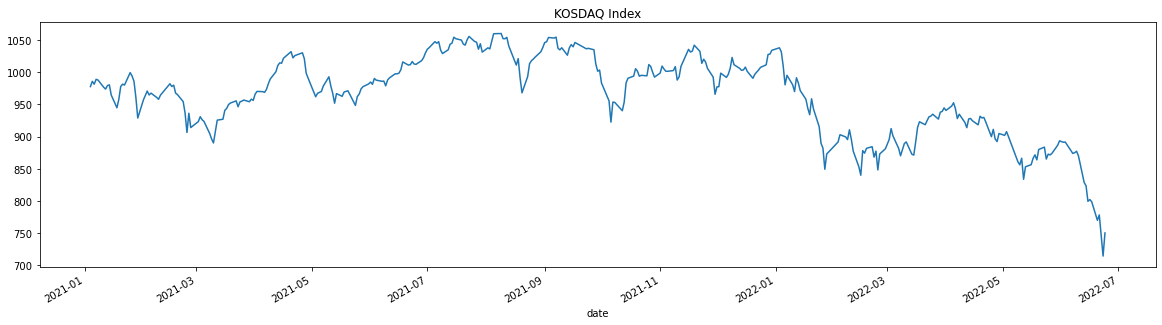

In [2]:
kosdaq_index = fdr.DataReader('KQ11', '2021') # 데이터 호출
kosdaq_index.columns = ['close','open','high','low','volume','change'] # 컬럼명 변경
kosdaq_index.index.name='date' # 인덱스 이름 생성
kosdaq_index.sort_index(inplace=True) # 인덱스(날짜) 로 정렬 
kosdaq_index['kosdaq_return'] = kosdaq_index['close']/kosdaq_index['close'].shift(1) # 수익율 : 전 날 종가대비 당일 종가
kosdaq_index.to_pickle('kosdaq_index.pkl') # 피클로 저장

# 차트 생성
kosdaq_index['close'].plot(figsize=(20,5))
plt.title('KOSDAQ Index')

일별 수익율 그래프도 함 그려보겠습니다. 2021년 3월부터 2021년 8월까지는 수익율의 변동성이 비교적 적어보입니다.

Text(0.5, 1.0, 'KOSDAQ Index Daily Return')

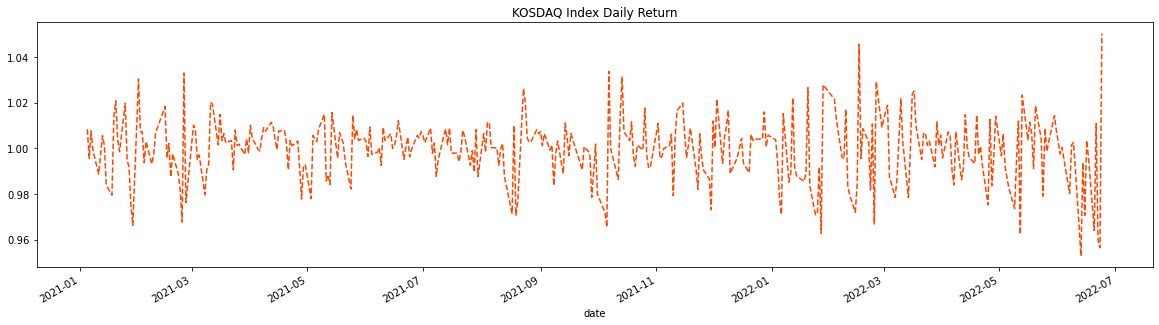

In [3]:
# 차트 생성
kosdaq_index['kosdaq_return'].plot(figsize=(20,5), color='orangered', style='--')
plt.title('KOSDAQ Index Daily Return')

저장된 Pickle 파일을 읽어서 첫 5 행 출력해 봅니다.

In [4]:
kosdaq_index = pd.read_pickle('kosdaq_index.pkl') 
kosdaq_index.head().style.set_table_attributes('style="font-size: 12px"')

,close,open,high,low,volume,change,kosdaq_return
date,,,,,,,
2021-01-04 00:00:00,977.620000,968.860000,977.620000,960.520000,1700000000.000000,0.009500,nan
2021-01-05 00:00:00,985.760000,976.430000,985.760000,965.530000,1810000000.000000,0.008300,1.008326
2021-01-06 00:00:00,981.390000,987.250000,990.880000,977.370000,1980000000.000000,-0.004400,0.995567
2021-01-07 00:00:00,988.860000,983.280000,993.910000,982.270000,2260000000.000000,0.007600,1.007612
2021-01-08 00:00:00,987.790000,990.700000,995.220000,978.120000,2560000000.000000,-0.001100,0.998918
